In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/ahyeo/OneDrive/문서/바탕 화면/Project2024/TextMining/practice/Crawling/data/naver_news_data.csv", encoding = 'cp949')
df

,topic,title,content,link
0,기후,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",(KT&G 제공) (서울=뉴스1) 이상학 기자 = KT&G(033780)는 글로벌 ...,https://n.news.naver.com/mnews/article/421/000...
1,기후,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...,https://n.news.naver.com/mnews/article/277/000...
2,기후,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",[서울=뉴시스] 강수윤 기자 = 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 ...,https://n.news.naver.com/mnews/article/003/001...
3,기후,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 (CG) [연합뉴스TV 제공] (전주=연합뉴스) 정경재 기자 ...,https://n.news.naver.com/mnews/article/001/001...
4,기후,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...,https://n.news.naver.com/mnews/article/030/000...
...,...,...,...,...
574,탄소중립,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...,https://n.news.naver.com/mnews/article/023/000...
575,탄소중립,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...,https://n.news.naver.com/mnews/article/015/000...
576,탄소중립,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...,https://n.news.naver.com/mnews/article/374/000...
577,탄소중립,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 [파이낸셜뉴스] 국내 ...,https://n.news.naver.com/mnews/article/014/000...


#### 토큰화

In [2]:
### 불필요 단어 제거
import re

title = df['title']
content = df['content']

def clean_text(text):
    return re.sub(r'\(.*?\)|\[.*?\]|=', '', text)

df['ctitle'] = df['title'].apply(clean_text)
df['ccontent'] = df['content'].apply(clean_text)

df

,topic,title,content,link,ctitle,ccontent
0,기후,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",(KT&G 제공) (서울=뉴스1) 이상학 기자 = KT&G(033780)는 글로벌 ...,https://n.news.naver.com/mnews/article/421/000...,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",이상학 기자 KT&G는 글로벌 환경정보 평가기관인 CDP로부터 기후변화 대응·...
1,기후,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...,https://n.news.naver.com/mnews/article/277/000...,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...
2,기후,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",[서울=뉴시스] 강수윤 기자 = 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 ...,https://n.news.naver.com/mnews/article/003/001...,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",강수윤 기자 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 집중 투자하는 K...
3,기후,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 (CG) [연합뉴스TV 제공] (전주=연합뉴스) 정경재 기자 ...,https://n.news.naver.com/mnews/article/001/001...,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 정경재 기자 농촌진흥청은 농업·농촌 현장에 과학기술 보...
4,기후,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...,https://n.news.naver.com/mnews/article/030/000...,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...
...,...,...,...,...,...,...
574,탄소중립,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...,https://n.news.naver.com/mnews/article/023/000...,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...
575,탄소중립,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...,https://n.news.naver.com/mnews/article/015/000...,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...
576,탄소중립,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...,https://n.news.naver.com/mnews/article/374/000...,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...
577,탄소중립,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 [파이낸셜뉴스] 국내 ...,https://n.news.naver.com/mnews/article/014/000...,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 국내 제조기업들이 '...


In [3]:
title = df[df['topic'] == '기후']['ctitle']
print(title)

0         KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정
1             환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의
2            삼성액티브자산 "글로벌기후테크인프라 상장 후 14% 수익"
3          농진청 "과학기술 보급으로 농촌 현장 애로·기후변화 등 대응"
4      송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간
                        ...                  
236       수도권으로 확산하는 '기후동행카드'…다음 동참 지자체는 '어디'
237                   신한금융, CDP 기후변화대응 'A' 평가
238                   “분리배출 깜박했는데”…그래도 재활용됩니다
239         농민 시위'에 화들짝…EU, 2040년 기후목표서 농업 배제
240            “한국은 기후 바보… 정부, 재생에너지에 관심 가져야”
Name: ctitle, Length: 241, dtype: object


In [4]:
content = df[df['topic'] == '기후']['ccontent']
print(content)

0        이상학 기자  KT&G는 글로벌 환경정보 평가기관인 CDP로부터 기후변화 대응·...
1      환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...
2       강수윤 기자  삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 집중 투자하는 K...
3      농촌진흥청 연구·개발    정경재 기자  농촌진흥청은 농업·농촌 현장에 과학기술 보...
4      송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...
                             ...                        
236    인천·김포·군포·과천까지 4개 지자체 동참…안양 유력 출시와 동시에 '히트' 누적 ...
237     이정필 기자  신한금융그룹은 탄소정보공개프로젝트 한국위원회가 발표한 기후변화대응 ...
238     환경 보호와 자원 절약을 위한 쓰레기 분리배출, 대표적인 게 투명 페트병입니다. ...
239    이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글로벌마켓 에 게재된 기사입니다. ...
240    최재천 석좌교수 ‘곤충사회’ 출간 “조만간 새·작은 동물 멸종될 수도” 최재천 이화...
Name: ccontent, Length: 241, dtype: object


In [5]:
## dataframe을 리스트로 변환
title_list = title.tolist()
content_list = content.tolist()

### 1. Title 관련 토큰화 및 워드클라우드

In [6]:
print(type(title_list[0]))
print(len(title_list))
print(title_list[0])

<class 'str'>
241
KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정


In [7]:
from konlpy.tag import Okt
import itertools

twit = Okt()
morphs_results = []

for sent in title_list :
    sent_cont = twit.morphs(sent)
    morphs_results.append(sent_cont)

#1차원으로 펴는 <평탄화> 작업 수행
morphs_results_flatten = list(itertools.chain.from_iterable(morphs_results))

print("#토큰의 수 : ",  len(morphs_results_flatten))
print("#앞 100개의 토큰")
print(morphs_results_flatten[:100])

#토큰의 수 :  3089
#앞 100개의 토큰
['KT', '&', 'G', ',', 'CDP', '기후변화', '대응', '?', '수자원', '관리', '부문', '우수', '기업', '선정', '환경', '장관', ',', 'WHO', '서', '태평양', '사무', '처', '장', '과', '기후변화', '대응', '논의', '삼', '성', '액티브', '자산', '"', '글로벌', '기후', '테크', '인프라', '상장', '후', '14%', '수익', '"', '농진청', '"', '과학기술', '보급', '으로', '농촌', '현장', '애로', '·', '기후변화', '등', '대응', '"', '송철', '한', 'GIST', '교수', ',', "'", '초미세먼지', ',', '기후변화', '그리고', '탄소', '중립', "'", '발간', '기후', '위기', ',', '인구', '감소', '해결', '할', '연구', '찾는다', '…', '총', '882억', '규모', '“', '전체', '유권자', '의', '33.5%', '가', '기후', '유권자', '…', '총선', '당락', '가를', '수', '있다', '”', '"', '기후변화', '로', '인한']


In [8]:
#명사만 추출
noun_results = []

# 형태소 분석을 수행하여 명사 추출
for sent in title_list:
    sent_nouns = twit.nouns(sent)
    # "탄소 중립"을 하나의 단어로 처리하기 위한 후처리
    processed_nouns = []
    skip_next = False
    for i in range(len(sent_nouns)):
        if skip_next:
            skip_next = False
            continue
        if sent_nouns[i] == "탄소" and i+1 < len(sent_nouns) and sent_nouns[i+1] == "중립":
            processed_nouns.append("탄소 중립")
            skip_next = True  # 다음 단어 ("중립") 건너뛰기
        else:
            processed_nouns.append(sent_nouns[i])
    noun_results.append(processed_nouns)

noun_results_flatten = list(itertools.chain.from_iterable(noun_results))

print("#토큰의 수 : ",  len(noun_results_flatten))
print("#앞 100개의 토큰")
print(noun_results_flatten[:100])

#토큰의 수 :  1828
#앞 100개의 토큰
['기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '환경', '장관', '태평양', '사무', '처', '기후변화', '대응', '논의', '액티브', '자산', '글로벌', '기후', '테크', '인프라', '상장', '후', '수익', '농진청', '과학기술', '보급', '농촌', '현장', '애로', '기후변화', '등', '대응', '송철', '교수', '초미세먼지', '기후변화', '탄소 중립', '발간', '기후', '위기', '인구', '감소', '해결', '연구', '총', '규모', '전체', '유권자', '기후', '유권자', '총선', '당락', '수', '기후변화', '농업', '위기', '품종', '개발', '답', '영화', '투모로우', '의', '기후', '재난', '기후변화', '대응', '수자원', '관리', '부문', '리더십', '등급', '획득', '질병', '청', '기후', '보건', '위기', '대응', '위해', '중장', '계획', '수립', '중', '기후', '위기', '캠페인', '기후', '인프라', '훈련', '성지', '도약', '경남', '고성', '다양성', '국회', '기후', '국회', '기후']


In [9]:
## 정제
tokens_const = [token for token in noun_results_flatten if len(token) > 1]
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 1650
#앞 100개의 토큰
['기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '환경', '장관', '태평양', '사무', '기후변화', '대응', '논의', '액티브', '자산', '글로벌', '기후', '테크', '인프라', '상장', '수익', '농진청', '과학기술', '보급', '농촌', '현장', '애로', '기후변화', '대응', '송철', '교수', '초미세먼지', '기후변화', '탄소 중립', '발간', '기후', '위기', '인구', '감소', '해결', '연구', '규모', '전체', '유권자', '기후', '유권자', '총선', '당락', '기후변화', '농업', '위기', '품종', '개발', '영화', '투모로우', '기후', '재난', '기후변화', '대응', '수자원', '관리', '부문', '리더십', '등급', '획득', '질병', '기후', '보건', '위기', '대응', '위해', '중장', '계획', '수립', '기후', '위기', '캠페인', '기후', '인프라', '훈련', '성지', '도약', '경남', '고성', '다양성', '국회', '기후', '국회', '기후', '위기', '캠페인', '축사', '이준석', '대표', '안양', '산업', '진흥', '안양대']


#### title 관련 wordcloud 진행

[('획득', 8), ('사업', 8), ('후보', 8), ('정책', 8), ('리더십', 9), ('대표', 9), ('경기도', 9), ('탄소 중립', 10), ('총선', 10), ('지원', 10), ('산업', 11), ('평가', 11), ('등급', 15), ('환경', 20), ('동행', 27), ('카드', 28), ('위기', 39), ('기후변화', 47), ('대응', 48), ('기후', 119)]


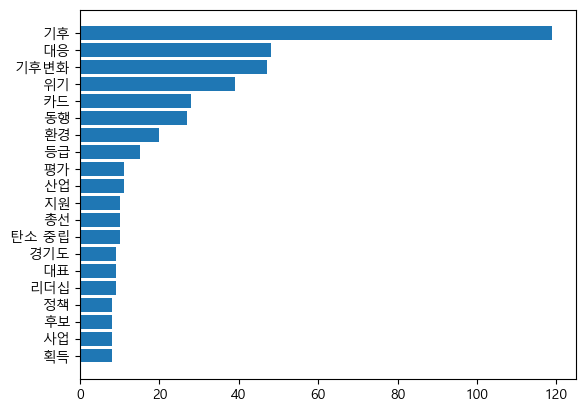

In [10]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):

    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:]) # 빈도수가 갈수록 증가하게 나타냄
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

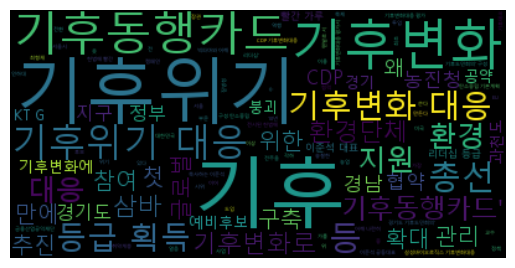

In [11]:
from wordcloud import WordCloud

font_path = 'c:/Windows/Fonts/malgun.ttf'

text = ' '.join(title_list)

wordcloud = WordCloud(font_path = font_path).generate(text) #word(text)로 입력

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

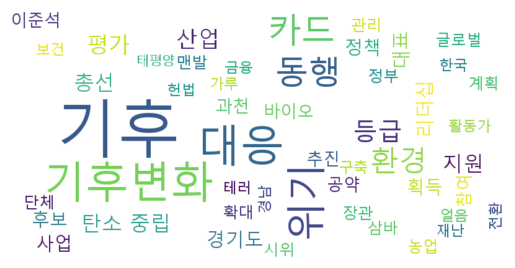

In [12]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #추출한 명사로 워드클라우드를 생성
# wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### 2. content 관련 토큰화 및 워드클라우드

In [13]:
print(type(content_list[0]))
print(len(content_list))
print(content_list[0])

<class 'str'>
241
  이상학 기자  KT&G는 글로벌 환경정보 평가기관인 CDP로부터 기후변화 대응·수자원 관리 부문 우수기업으로 선정됐다고 19일 밝혔다. KT&G는 지난해에 이어 기후변화 대응·수자원 관리 두 분야 모두에서 Leadership에 해당하는 상위 등급을 획득했다. 특히 수자원 관리 부문의 경우 지난해 Leadership A-에서 최고등급인 A로 한 단계 상승했으며, 전 세계 수상기업 100개 중 국내에서는 3개 기업 만 A등급을 받았다. 기후변화 대응 부문은 지난해와 동일한 Leadership A-등급을 유지했다. KT&G는 2021년 중장기 환경경영 비전인 '2030 Green Impact'를 수립하고, 가치사슬 전체의 탄소중립 달성을 위한 ESG경영을 실천하고 있다. 지구온도의 상승폭을 1.5도 이내로 제한하는데 기여하는 온실가스 감축 목표를 세우고, 2022년 기준연도 대비 국내외 사업장의 온실가스 배출량을 7.5% 감축하는 성과를 거뒀다. 또 공급망의 온실가스 배출량에 대해서는 제3자 검증을 받아 데이터의 신뢰도와 객관성도 강화했다. 수자원 관리 부문에서는 2030년까지 국내외 제조 사업장에서 사용하는 물의 양을 2020년 대비 20% 절감하는 목표를 수립해 실행에 옮기고 있다. CDP는 영국에서 2000년에 설립된 비영리 단체로, 전 세계 2만3000여개 기업에 환경 관련 경영정보 공개를 요청하고, 이에 대한 정보 분석과 평가를 수행하고 있다. KT&G 관계자는 "글로벌 스탠더드에 발맞춘 기후변화 대응과 체계적인 수자원 관리 역량을 인정받아 CDP로부터 우수기업에 선정됐다"며 "향후에도 순환경제 전환 가속화에 앞장서는 등 진정성 있는 ESG경영을 추진할 것"이라고 말했다.


In [39]:
twit = Okt()
morphs_results = []

for sent in content_list :
    sent_cont = twit.morphs(sent)
    morphs_results.append(sent_cont)

#1차원으로 펴는 <평탄화> 작업 수행
morphs_results_flatten = list(itertools.chain.from_iterable(morphs_results))

print("#토큰의 수 : ",  len(morphs_results_flatten))
print("#앞 100개의 토큰")
print(morphs_results_flatten[:100])

#토큰의 수 :  130596
#앞 100개의 토큰
['이상', '학', '기자', 'KT', '&', 'G', '는', '글로벌', '환경', '정보', '평가', '기관', '인', 'CDP', '로부터', '기후변화', '대응', '·', '수자원', '관리', '부문', '우수', '기업', '으로', '선정', '됐다고', '19일', '밝혔다', '.', 'KT', '&', 'G', '는', '지난해', '에', '이어', '기후변화', '대응', '·', '수자원', '관리', '두', '분야', '모두', '에서', 'Leadership', '에', '해당', '하는', '상위', '등급', '을', '획득', '했다', '.', '특히', '수자원', '관리', '부문', '의', '경우', '지난해', 'Leadership', 'A', '-', '에서', '최고', '등급', '인', 'A', '로', '한', '단계', '상승', '했으며', ',', '전', '세계', '수상', '기업', '100', '개', '중', '국내', '에서는', '3', '개', '기업', '만', 'A', '등급', '을', '받았다', '.', '기후변화', '대응', '부문', '은', '지난해', '와']


In [23]:
#명사만 추출
noun_results = []

# 형태소 분석을 수행하여 명사 추출
for sent in content_list:
    sent_nouns = twit.nouns(sent)
    # "탄소 중립"을 하나의 단어로 처리하기 위한 후처리
    processed_nouns = []
    skip_next = False
    for i in range(len(sent_nouns)):
        if skip_next:
            skip_next = False
            continue
        if sent_nouns[i] == "탄소" and i+1 < len(sent_nouns) and sent_nouns[i+1] == "중립":
            processed_nouns.append("탄소 중립")
            skip_next = True  # 다음 단어 ("중립") 건너뛰기
        else:
            processed_nouns.append(sent_nouns[i])
    noun_results.append(processed_nouns)

noun_results_flatten = list(itertools.chain.from_iterable(noun_results))

print("#토큰의 수 : ", len(noun_results_flatten))
print("#앞 100개의 토큰")
print(noun_results_flatten[:100])

KeyboardInterrupt: 

In [15]:
tokens_const = [token for token in noun_results_flatten if len(token) > 1]
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 54864
#앞 100개의 토큰
['이상', '기자', '글로벌', '환경', '정보', '평가', '기관', '로부터', '기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '지난해', '기후변화', '대응', '수자원', '관리', '분야', '모두', '해당', '상위', '등급', '획득', '수자원', '관리', '부문', '경우', '지난해', '최고', '등급', '단계', '상승', '세계', '수상', '기업', '국내', '기업', '등급', '기후변화', '대응', '부문', '지난해', '등급', '유지', '장기', '환경', '경영', '수립', '가치', '사슬', '전체', '탄소 중립', '달성', '경영', '실천', '온도', '상승', '이내', '제한', '기여', '온실가스', '감축', '목표', '기준', '연도', '대비', '국내외', '사업', '온실가스', '배출량', '감축', '성과', '공급망', '온실가스', '배출량', '대해', '검증', '데이터', '신뢰', '객관성', '수자원', '관리', '부문', '국내외', '제조', '사업', '사용', '물의', '대비', '절감', '목표', '수립', '실행', '영국', '설립', '비영리']


#### content 관련 wordcloud

[('시민', 171), ('참여', 181), ('기술', 182), ('서울시', 185), ('전환', 186), ('계획', 191), ('기업', 204), ('사업', 215), ('서울', 236), ('위해', 245), ('환경', 255), ('정책', 257), ('동행', 275), ('에너지', 313), ('기후변화', 331), ('지역', 340), ('카드', 361), ('대응', 389), ('위기', 476), ('기후', 1248)]


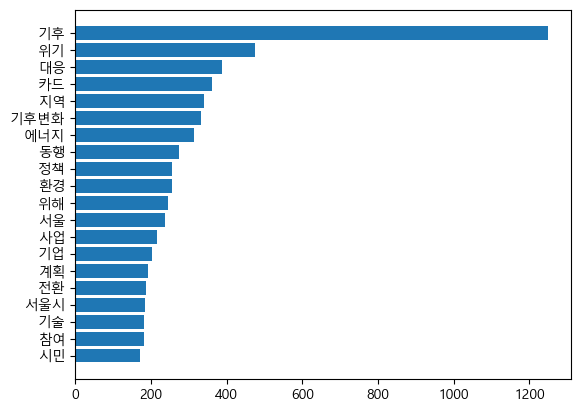

In [16]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):

    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:]) # 빈도수가 갈수록 증가하게 나타냄
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

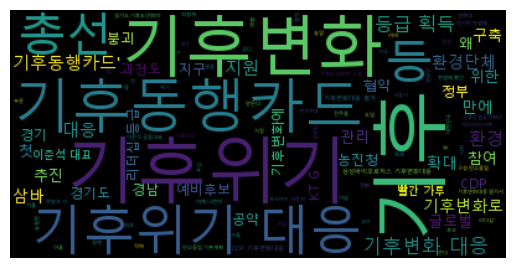

In [18]:
from wordcloud import WordCloud

font_path = 'c:/Windows/Fonts/malgun.ttf'

text = ' '.join(title_list)

wordcloud = WordCloud(font_path = font_path).generate(text) #word(text)로 입력

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

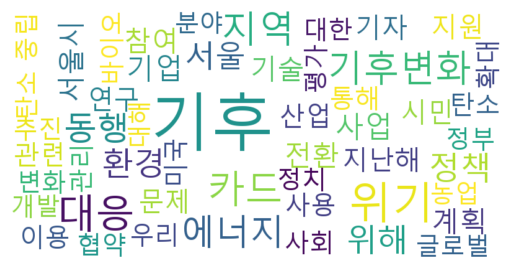

In [19]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #추출한 명사로 워드클라우드를 생성
# wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### 전체 뉴스 관련 정제 및 워드클라우드

In [20]:
df

,topic,title,content,link,ctitle,ccontent
0,기후,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",(KT&G 제공) (서울=뉴스1) 이상학 기자 = KT&G(033780)는 글로벌 ...,https://n.news.naver.com/mnews/article/421/000...,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",이상학 기자 KT&G는 글로벌 환경정보 평가기관인 CDP로부터 기후변화 대응·...
1,기후,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...,https://n.news.naver.com/mnews/article/277/000...,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...
2,기후,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",[서울=뉴시스] 강수윤 기자 = 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 ...,https://n.news.naver.com/mnews/article/003/001...,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",강수윤 기자 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 집중 투자하는 K...
3,기후,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 (CG) [연합뉴스TV 제공] (전주=연합뉴스) 정경재 기자 ...,https://n.news.naver.com/mnews/article/001/001...,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 정경재 기자 농촌진흥청은 농업·농촌 현장에 과학기술 보...
4,기후,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...,https://n.news.naver.com/mnews/article/030/000...,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...
...,...,...,...,...,...,...
574,탄소중립,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...,https://n.news.naver.com/mnews/article/023/000...,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...
575,탄소중립,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...,https://n.news.naver.com/mnews/article/015/000...,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...
576,탄소중립,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...,https://n.news.naver.com/mnews/article/374/000...,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...
577,탄소중립,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 [파이낸셜뉴스] 국내 ...,https://n.news.naver.com/mnews/article/014/000...,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 국내 제조기업들이 '...


In [21]:
### 불필요 단어 제거
title = df['title']
content = df['content']

def clean_text(text):
    return re.sub(r'\(.*?\)|\[.*?\]|=', '', text)

df['ctitle'] = df['title'].apply(clean_text)
df['ccontent'] = df['content'].apply(clean_text)

df

,topic,title,content,link,ctitle,ccontent
0,기후,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",(KT&G 제공) (서울=뉴스1) 이상학 기자 = KT&G(033780)는 글로벌 ...,https://n.news.naver.com/mnews/article/421/000...,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",이상학 기자 KT&G는 글로벌 환경정보 평가기관인 CDP로부터 기후변화 대응·...
1,기후,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...,https://n.news.naver.com/mnews/article/277/000...,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...
2,기후,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",[서울=뉴시스] 강수윤 기자 = 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 ...,https://n.news.naver.com/mnews/article/003/001...,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",강수윤 기자 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 집중 투자하는 K...
3,기후,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 (CG) [연합뉴스TV 제공] (전주=연합뉴스) 정경재 기자 ...,https://n.news.naver.com/mnews/article/001/001...,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 정경재 기자 농촌진흥청은 농업·농촌 현장에 과학기술 보...
4,기후,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...,https://n.news.naver.com/mnews/article/030/000...,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...
...,...,...,...,...,...,...
574,탄소중립,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...,https://n.news.naver.com/mnews/article/023/000...,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...
575,탄소중립,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...,https://n.news.naver.com/mnews/article/015/000...,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...
576,탄소중립,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...,https://n.news.naver.com/mnews/article/374/000...,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...
577,탄소중립,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 [파이낸셜뉴스] 국내 ...,https://n.news.naver.com/mnews/article/014/000...,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 국내 제조기업들이 '...


In [22]:
title = df['ctitle']
content = df['ccontent']

title_list = title.tolist()
content_list = content.tolist()

In [25]:
## title
noun_results = []

# 형태소 분석을 수행하여 명사 추출
for sent in title_list:
    sent_nouns = twit.nouns(sent)
    # "탄소 중립"을 하나의 단어로 처리하기 위한 후처리
    processed_nouns = []
    skip_next = False
    for i in range(len(sent_nouns)):
        if skip_next:
            skip_next = False
            continue
        if sent_nouns[i] == "탄소" and i+1 < len(sent_nouns) and sent_nouns[i+1] == "중립":
            processed_nouns.append("탄소 중립")
            skip_next = True  # 다음 단어 ("중립") 건너뛰기
        else:
            processed_nouns.append(sent_nouns[i])
    noun_results.append(processed_nouns)

noun_results_flatten = list(itertools.chain.from_iterable(noun_results))

print("#토큰의 수 : ", len(noun_results_flatten))
print("#앞 100개의 토큰")
print(noun_results_flatten[:100])

tokens_const = [token for token in noun_results_flatten if len(token) > 1]
print('#정제 완료의 토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수 :  4256
#앞 100개의 토큰
['기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '환경', '장관', '태평양', '사무', '처', '기후변화', '대응', '논의', '액티브', '자산', '글로벌', '기후', '테크', '인프라', '상장', '후', '수익', '농진청', '과학기술', '보급', '농촌', '현장', '애로', '기후변화', '등', '대응', '송철', '교수', '초미세먼지', '기후변화', '탄소 중립', '발간', '기후', '위기', '인구', '감소', '해결', '연구', '총', '규모', '전체', '유권자', '기후', '유권자', '총선', '당락', '수', '기후변화', '농업', '위기', '품종', '개발', '답', '영화', '투모로우', '의', '기후', '재난', '기후변화', '대응', '수자원', '관리', '부문', '리더십', '등급', '획득', '질병', '청', '기후', '보건', '위기', '대응', '위해', '중장', '계획', '수립', '중', '기후', '위기', '캠페인', '기후', '인프라', '훈련', '성지', '도약', '경남', '고성', '다양성', '국회', '기후', '국회', '기후']
#정제 완료의 토큰의 수: 3761
#앞 100개의 토큰
['기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '환경', '장관', '태평양', '사무', '기후변화', '대응', '논의', '액티브', '자산', '글로벌', '기후', '테크', '인프라', '상장', '수익', '농진청', '과학기술', '보급', '농촌', '현장', '애로', '기후변화', '대응', '송철', '교수', '초미세먼지', '기후변화', '탄소 중립', '발간', '기후', '위기', '인구', '감소', '해결', '연구', '규모', '전체', '유권자', '기후', '유권자', '

[('전환', 18), ('가장', 18), ('도시', 18), ('글로벌', 19), ('에너지', 19), ('경기도', 20), ('획득', 21), ('환경', 23), ('동행', 27), ('카드', 28), ('지원', 31), ('탄소', 33), ('대응', 51), ('위기', 52), ('기후변화', 57), ('지구온난화', 60), ('지구', 62), ('온난화', 74), ('탄소 중립', 115), ('기후', 135)]


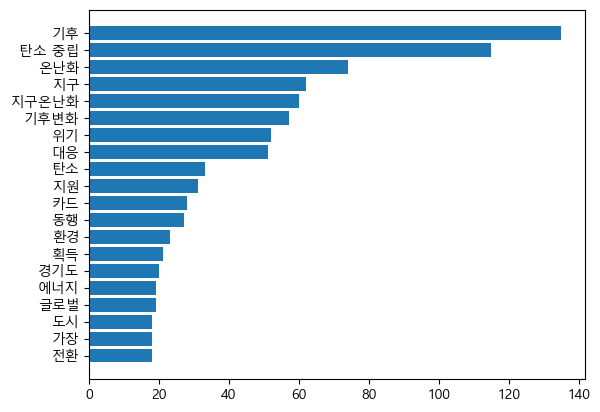

In [26]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):

    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:]) # 빈도수가 갈수록 증가하게 나타냄
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

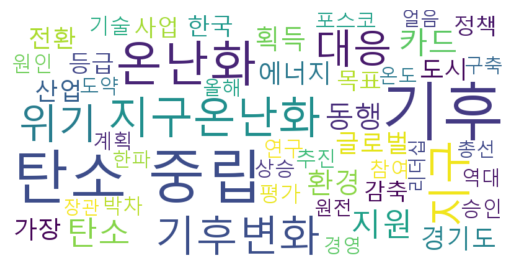

In [27]:
plt.show()
wordcloud = WordCloud(
    font_path=font_path,
    max_font_size=100,
    width=800,  #이미지 너비 지정
    height=400,  #이미지 높이 지정
    background_color='white',  #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt)  #추출한 명사로 워드클라우드를 생성
# wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [28]:
## content
noun_results = []

# 형태소 분석을 수행하여 명사 추출
for sent in content_list:
    sent_nouns = twit.nouns(sent)
    # "탄소 중립"을 하나의 단어로 처리하기 위한 후처리
    processed_nouns = []
    skip_next = False
    for i in range(len(sent_nouns)):
        if skip_next:
            skip_next = False
            continue
        if sent_nouns[i] == "탄소" and i+1 < len(sent_nouns) and sent_nouns[i+1] == "중립":
            processed_nouns.append("탄소 중립")
            skip_next = True  # 다음 단어 ("중립") 건너뛰기
        else:
            processed_nouns.append(sent_nouns[i])
    noun_results.append(processed_nouns)

noun_results_flatten = list(itertools.chain.from_iterable(noun_results))

print("#토큰의 수 : ", len(noun_results_flatten))
print("#앞 100개의 토큰")
print(noun_results_flatten[:100])

tokens_const = [token for token in noun_results_flatten if len(token) > 1]
print('#정제 완료의 토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수 :  147935
#앞 100개의 토큰
['이상', '학', '기자', '글로벌', '환경', '정보', '평가', '기관', '로부터', '기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '지난해', '기후변화', '대응', '수자원', '관리', '두', '분야', '모두', '해당', '상위', '등급', '획득', '수자원', '관리', '부문', '경우', '지난해', '최고', '등급', '로', '단계', '상승', '전', '세계', '수상', '기업', '개', '중', '국내', '개', '기업', '만', '등급', '기후변화', '대응', '부문', '지난해', '등급', '유지', '중', '장기', '환경', '경영', '를', '수립', '가치', '사슬', '전체', '탄소 중립', '달성', '위', '경영', '실천', '온도', '상승', '폭', '도', '이내', '제한', '기여', '온실가스', '감축', '목표', '기준', '연도', '대비', '국내외', '사업', '온실가스', '배출량', '감축', '성과', '또', '공급망', '온실가스', '배출량', '대해', '제', '자', '검증', '데이터', '신뢰', '도']
#정제 완료의 토큰의 수: 123581
#앞 100개의 토큰
['이상', '기자', '글로벌', '환경', '정보', '평가', '기관', '로부터', '기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '지난해', '기후변화', '대응', '수자원', '관리', '분야', '모두', '해당', '상위', '등급', '획득', '수자원', '관리', '부문', '경우', '지난해', '최고', '등급', '단계', '상승', '세계', '수상', '기업', '국내', '기업', '등급', '기후변화', '대응', '부문', '지난해', '등급', '유지', '장기', '환경', '경영', '수립'

[('계획', 410), ('기온', 422), ('기술', 434), ('연구', 438), ('지난해', 447), ('배출', 455), ('기업', 487), ('지원', 512), ('환경', 525), ('대응', 550), ('사업', 583), ('기후변화', 599), ('위해', 601), ('위기', 604), ('탄소', 650), ('에너지', 731), ('지역', 770), ('탄소 중립', 818), ('지구', 858), ('기후', 1793)]


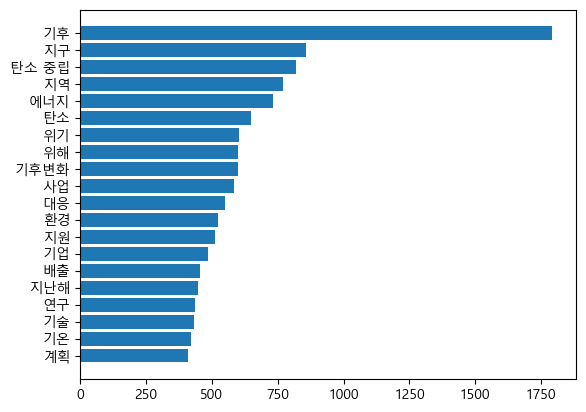

In [30]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):

    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:]) # 빈도수가 갈수록 증가하게 나타냄
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

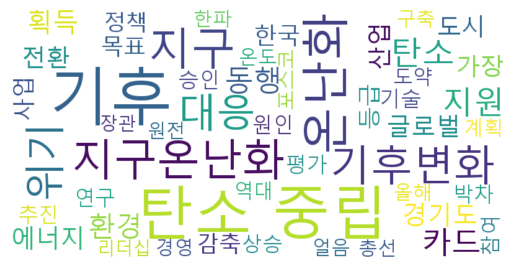

In [29]:
plt.show()
wordcloud = WordCloud(
    font_path=font_path,
    max_font_size=100,
    width=800,  #이미지 너비 지정
    height=400,  #이미지 높이 지정
    background_color='white',  #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt)  #추출한 명사로 워드클라우드를 생성
# wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()